# Milestone 2 - Hypothesis Simulation 

## Author - Student name



## Instructions
Use the <a href="https://archive.ics.uci.edu/ml/datasets/Automobile">automotive data set</a> to perform the following:

1. Identify a likely distribution for price and several other features.
2. Compute basic summary statistics by both classical, bootstrap, and Bayesian methods
3. Compute confidence intervals for these summary statistics by classical, bootstrap, and Bayesian methods
4. Correctly use hypothesis tests to determine if the differences in pairs and multiple populations are significant:
            Classical tests
            Tukey’s Honest Significant Differences (HSD)
            Bootstrap methods
            Bayesian model


### Note
Please clearly outline the results with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [2]:
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

In [3]:
import pandas as pd
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sbn

auto_data = pd.read_csv(fileName)
print(auto_data.head())
print(auto_data.dtypes)


   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...    engine-size  \
0  convertible          rwd           front        88.6  ...            130   
1  convertible          rwd           front        88.6  ...            130   
2    hatchback          rwd           front        94.5  ...            152   
3        sedan          fwd           front        99.8  ...            109   
4        sedan          4wd           front        99.4  ...            136   

   fuel-system  bore  stroke compressi

I will now clean up the price and turn it to an float64 object

In [10]:
##auto_data['price'] = auto_data['price'].replace('?', np.NaN)
auto_data['price']= auto_data['price'].replace(to_replace = "?", value = float("NaN"))
auto_data['price'] = pd.to_numeric(auto_data['price'], errors ='coerce')
price_out = np.isnan(auto_data['price'])
freemean = np.nanmean(auto_data['price'], axis = 0)
auto_data['price']= auto_data['price'].replace(to_replace = float("NaN"), value = freemean)
##print(freemean)
##print(auto_data.dtypes)
print(auto_data.loc[:,"price"].describe())


count      205.000000
mean     13207.129353
std       7868.768212
min       5118.000000
25%       7788.000000
50%      10595.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64


Let's take a look at the price distribution and see what type of distibution it resembles.

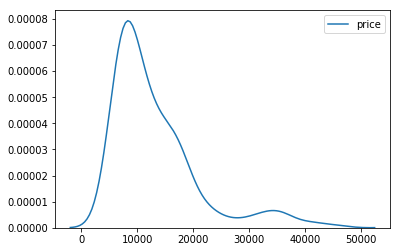

In [9]:
sbn.kdeplot(auto_data.loc[:,"price"])

Let's run some samples

In [28]:
auto_aspiration = auto_data.groupby('drive-wheels')
auto_aspy = pd.DataFrame({'count': auto_aspiration.size(), 
                       'mean': auto_aspiration.aggregate(np.mean).loc[:, 'price']})
print(auto_aspy.head())


              count          mean
drive-wheels                     
4wd               9  10570.569928
fwd             120   9310.818823
rwd              76  19671.422755


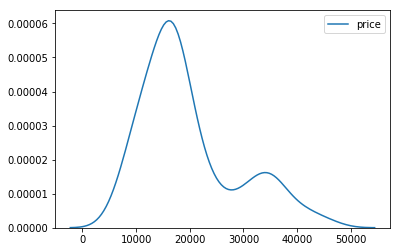

In [39]:
auto_data.loc[:,"rwd"] = auto_data.loc[:,"drive-wheels"].isin(['rwd']).astype(int)
auto_data.loc[:,"fwd"] = auto_data.loc[:,"drive-wheels"].isin(['fwd']).astype(int)
auto_rwd = auto_data.query('rwd == 1')
auto_fwd = auto_data.query('fwd == 1')
sbn.kdeplot( auto_rwd.loc[:,"price"] )